<h2 align="center">Image Compression with K-means Clustering</h2>

### Importing Libraries

In [0]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [0]:
plt.rcParams['figure.figsize'] = (20, 12)

### Data Preprocessing 

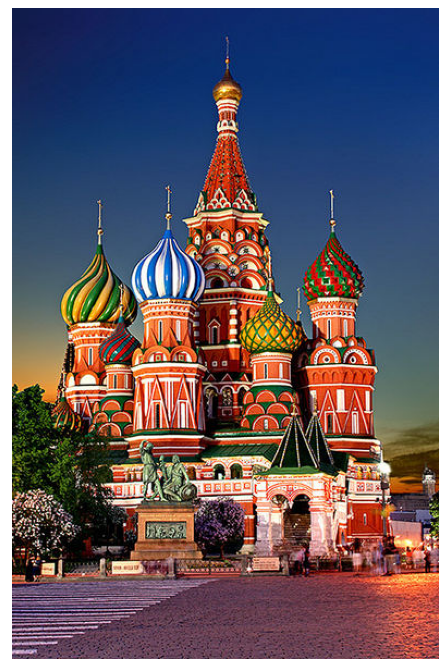

In [5]:
img = io.imread('images/1-Saint-Basils-Cathedral.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);

In [6]:
img.shape

(600, 394, 3)

In [7]:
img_data = (img / 255.0).reshape(-1, 3)
img_data.shape

(236400, 3)

### Visualizing the Color Space using Point Clouds

In [0]:
class plot_utils:
    def __init__(self, img_data, title, num_pixels=10000, colors=None):
        self.img_data = img_data
        self.title = title
        self.num_pixels = num_pixels
        self.colors = colors

    def colorSpace(self):
        if self.colors is None:
            self.colors = self.img_data

        rand = np.random.RandomState(42)
        index = rand.permutation(self.img_data.shape[0])[:self.num_pixels]
        colors = self.colors[index]
        R, G, B = self.img_data[index].T
        fig, ax = plt.subplots(1, 2, figsize=(12,8))
        ax[0].scatter(R, G, color=colors, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
        ax[1].scatter(R, B, color=colors, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
        fig.suptitle(self.title, size=20)

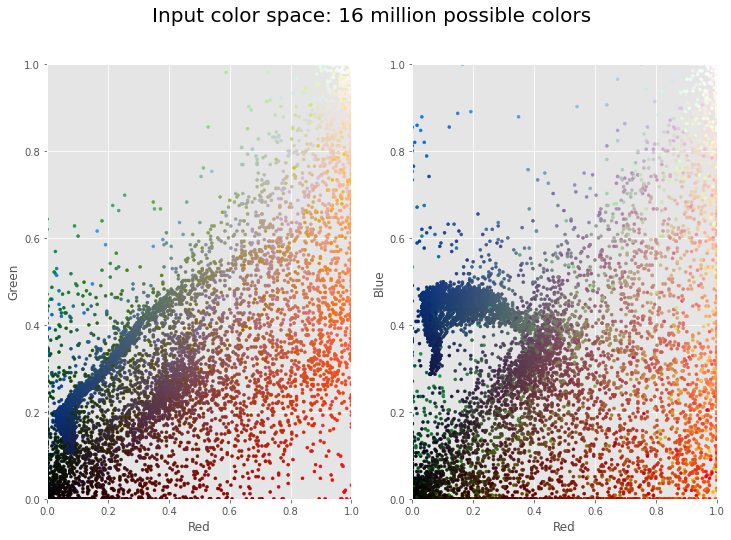

In [9]:
x = plot_utils(img_data, title='Input color space: 16 million possible colors')
x.colorSpace()

### Visualizing the K-means Reduced Color Space

In [0]:
from sklearn.cluster import MiniBatchKMeans

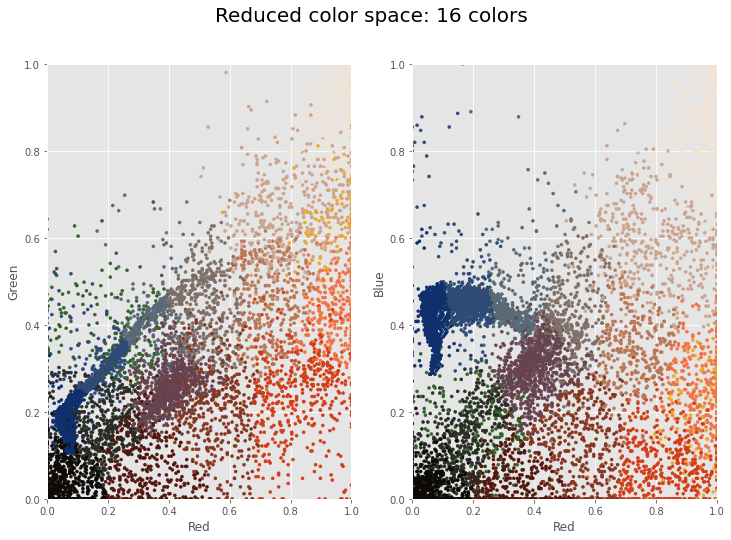

In [11]:
kmeans = MiniBatchKMeans(16).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

y = plot_utils(img_data, colors=k_colors, title="Reduced color space: 16 colors")
y.colorSpace()

### K-means Image Compression

In [0]:
img_dir = 'images/'

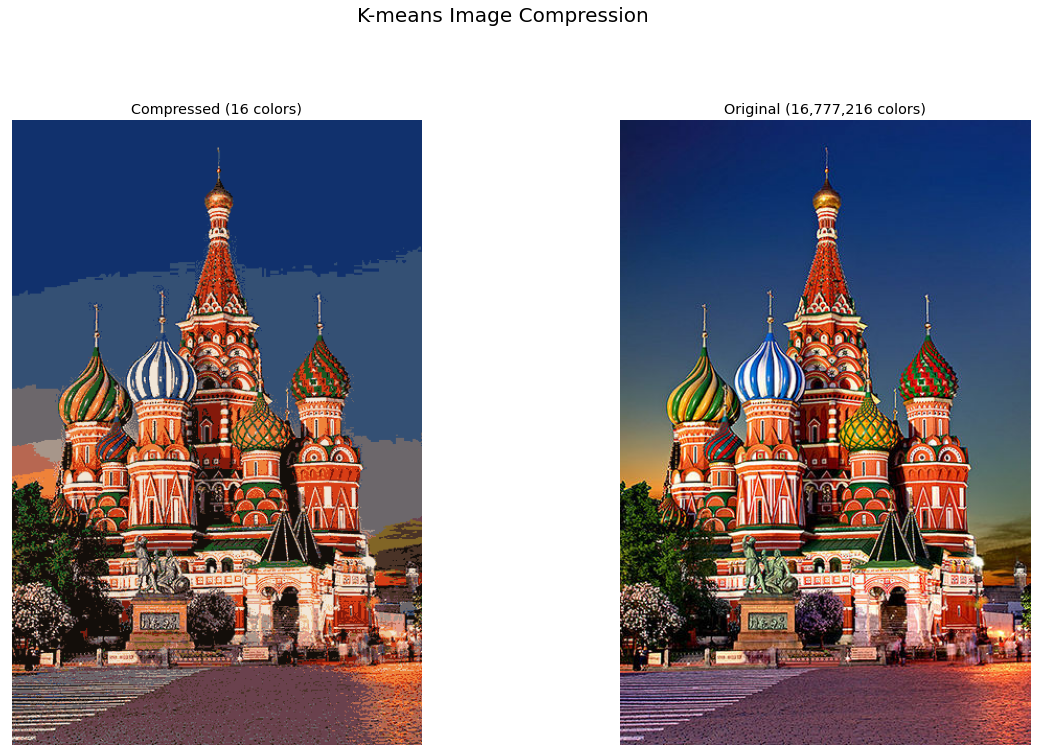

In [17]:
def color_compression(image=os.listdir(img_dir), k=16):
    input_img = io.imread(img_dir + image[1])
    img_data = (input_img / 255.0).reshape(-1, 3)
    
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

    k_img = np.reshape(k_colors, (input_img.shape))
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('K-means Image Compression', fontsize=20)
    
    ax1.set_title('Compressed (16 colors)')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    ax2.set_title('Original (16,777,216 colors)')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    plt.subplots_adjust(top=0.85)
    plt.show()

color_compression()